In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('../')

import nets.maskrcnn.angledataset as a

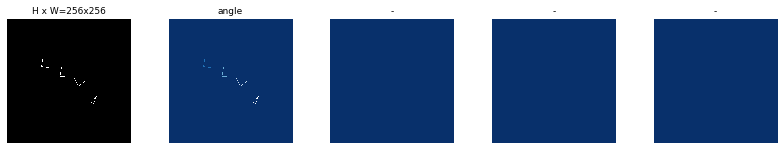

In [3]:
train, val, test = a.AngleDataset.createSets()
a.AngleDataset.show(train, 1)

uint8


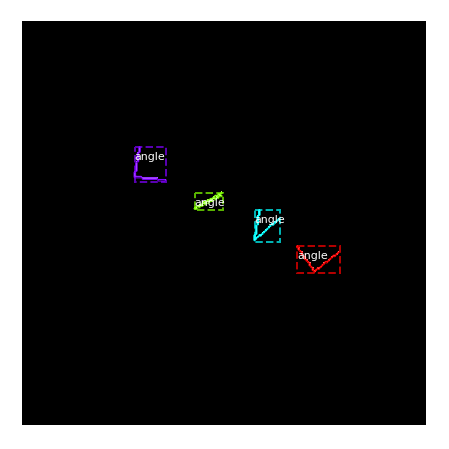

In [19]:
sys.path.append('../external/mask_rcnn/')

from mrcnn import model as modellib
from mrcnn import visualize

import nets.maskrcnn.config as C
WHICH = 10 # ID of the data point
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(test, C.TestingConfig(), WHICH, use_mini_mask = False)
print(gt_mask.dtype)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            test.class_names, figsize=(8, 8))

In [5]:
gt_bbox

array([[ 79,  71, 101,  91],
       [108, 109, 119, 127],
       [119, 147, 139, 163],
       [142, 174, 159, 201]], dtype=int32)

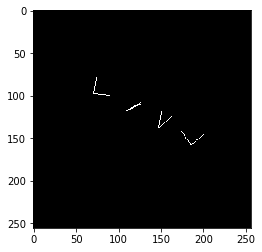

In [8]:
imshow(original_image)

In [9]:
gt_mask.shape

(256, 256, 4)

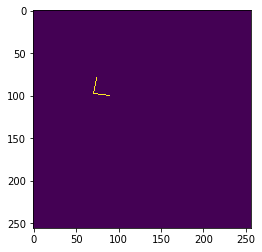

In [12]:
imshow(gt_mask[:,:,0])

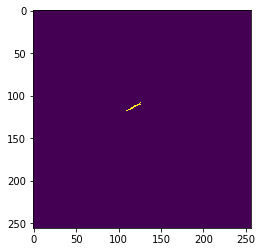

In [13]:
imshow(gt_mask[:,:,1])

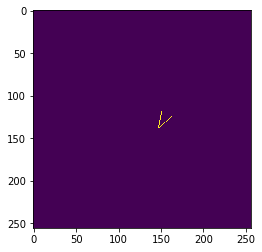

In [14]:
imshow(gt_mask[:,:,2])

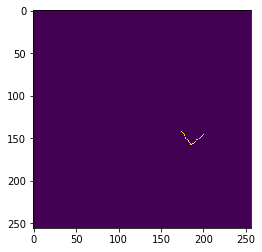

In [15]:
imshow(gt_mask[:,:,3])

In [20]:
test.image_info[10]

{'id': 10,
 'source': 'stimuli',
 'path': None,
 'image': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sparse': [[98, 71, 86, 281],
  [118, 109, 4, 330],
  [138, 147, 40, 279],
  [158, 185, 89, 234]],
 'parameters': 1101996057600000000,
 'mask': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'angles': [86, 4, 40, 89]}

In [21]:
# LABELS
# in form 
#    sparse = [Y, X, ANGLE, startangle]
#    according to https://github.com/haehn/cnn-stimuli/blob/ce0e6dfee0194dcca9dffcf4aabd03ea8c562565/figure5.py#L208
test.image_info[10]['sparse']

[[98, 71, 86, 281],
 [118, 109, 4, 330],
 [138, 147, 40, 279],
 [158, 185, 89, 234]]

In [22]:
# so the angles really are 86, 4, 40, 89 degrees
# for training, we need to map them to 0..1 as our regression target vector